<a href="https://colab.research.google.com/github/Shadabur-Rahaman/30-days-ml-projects/blob/main/Day1_Linear_Regression/Day1_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned parameters: Bias = 2.064, Weight = 2.580
True parameters: Bias = 1.2, Weight = 3.5


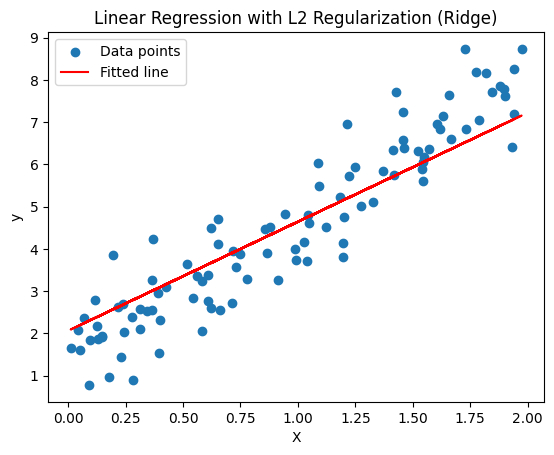

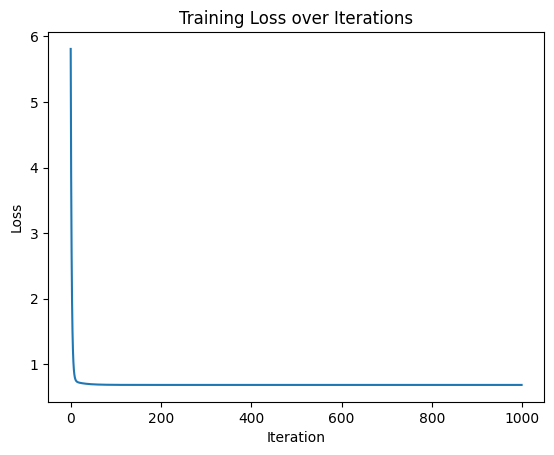

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
m = 100  # samples
X = 2 * np.random.rand(m, 1)
true_w = 3.5
true_b = 1.2
noise = np.random.randn(m, 1) * 0.8
y = true_w * X + true_b + noise

# Add bias term (column of ones)
X_b = np.c_[np.ones((m, 1)), X]  # shape (m, 2)

# Hyperparameters
learning_rate = 0.1
n_iterations = 1000
lambda_reg = 0.1  # regularization strength

# Initialize weights (w and b)
theta = np.random.randn(2, 1)

# Gradient Descent with L2 Regularization
loss_history = []

for iteration in range(n_iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2) + (lambda_reg/2) * np.sum(theta[1:]**2)  # exclude bias from regularization
    loss_history.append(cost)

    gradients = (1/m) * X_b.T.dot(errors) + lambda_reg * np.r_[[[0]], theta[1:]]  # no reg on bias
    theta -= learning_rate * gradients

# Results
print(f"Learned parameters: Bias = {theta[0][0]:.3f}, Weight = {theta[1][0]:.3f}")
print(f"True parameters: Bias = {true_b}, Weight = {true_w}")

# Plot data and regression line
plt.scatter(X, y, label="Data points")
plt.plot(X, X_b.dot(theta), color='red', label="Fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with L2 Regularization (Ridge)")
plt.legend()
plt.show()

# Plot loss convergence
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.show()
